In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime

/home/bastien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# 1. Simple

In [3]:
AE_simple = ShallowAE()

In [4]:
AE_simple.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.0769 - val_loss: 0.0536
Epoch 2/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.0482 - val_loss: 0.0438
Epoch 3/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0408 - val_loss: 0.0379
Epoch 4/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.0357 - val_loss: 0.0336
Epoch 5/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.0321 - val_loss: 0.0306
Epoch 6/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.0296 - val_loss: 0.0286
Epoch 7/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.0279 - val_loss: 0.0271
Epoch 8/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0266 - val_loss: 0.0260
Epoch 9/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.0256 - val_l

In [5]:
recerr = AE_simple.reconstruction_error(x_test)

In [6]:
x_rec_test = AE_simple.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)

In [7]:
mse

0.010757143

In [8]:
recerr

0.010757140822708606

# 2. Sparse

## 2.1 sparsity_weight=0.1

In [10]:
AE_sparse_L1 = SparseShallowAE_L1(sparsity_weight=0.1)

In [11]:
AE_sparse_L1.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 20.6730 - val_loss: 0.2897
Epoch 2/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.1737 - val_loss: 0.1215
Epoch 3/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1158 - val_loss: 0.1052
Epoch 4/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1049 - val_loss: 0.0995
Epoch 5/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1001 - val_loss: 0.0966
Epoch 6/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.0974 - val_loss: 0.0947
Epoch 7/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.0957 - val_loss: 0.0935
Epoch 8/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.0944 - val_loss: 0.0926
Epoch 9/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0935 - val_loss

In [12]:
recerr = AE_sparse_L1.reconstruction_error(x_test)

In [13]:
x_rec_test = AE_sparse_L1.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)

In [14]:
mse

0.08664189

In [15]:
recerr

0.0867762218594551

In [23]:
H_test = AE_sparse_L1.encode(x_test)
l1 = np.sum(0.1*np.abs(H_test))

In [30]:
batchSize=32
H_test = AE_sparse_L1.encode(x_test)
l1 = np.mean([np.sum(0.1*np.abs(H_test[i*batchSize:(i+1)*batchSize])) for i in range(int(10000/batchSize))])

In [31]:
l1

0.00013453871

In [32]:
l1 + mse

0.08677643

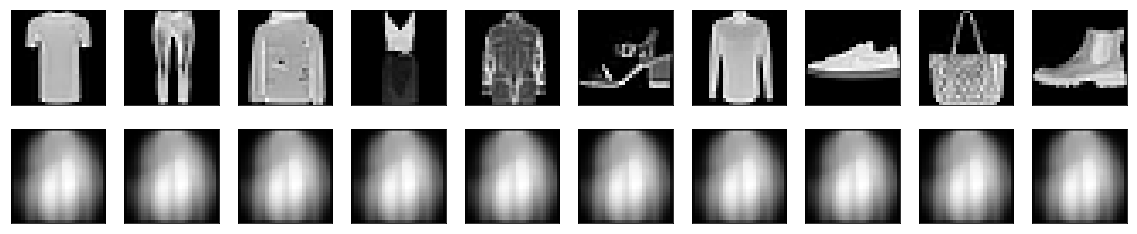

In [18]:
AE_sparse_L1.plot_reconstructions(x_small)

## 2.1 sparsity_weight=0.75

In [34]:
AE_sparse_L1 = SparseShallowAE_L1(sparsity_weight=0.75)

In [35]:
AE_sparse_L1.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 118us/step - loss: 150.3625 - val_loss: 1.2917
Epoch 2/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.4632 - val_loss: 0.1660
Epoch 3/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.1540 - val_loss: 0.1207
Epoch 4/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.1227 - val_loss: 0.1080
Epoch 5/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1115 - val_loss: 0.1021
Epoch 6/100
60000/60000 [==============================] - 7s 110us/step - loss: 0.1056 - val_loss: 0.0988
Epoch 7/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1019 - val_loss: 0.0966
Epoch 8/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0992 - val_loss: 0.0951
Epoch 9/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.0975 - va

In [36]:
recerr = AE_sparse_L1.reconstruction_error(x_test)

In [37]:
x_rec_test = AE_sparse_L1.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)

In [38]:
mse

0.08664118

In [39]:
recerr

0.08680764309167861

In [40]:
H_test = AE_sparse_L1.encode(x_test)
l1 = np.sum(0.1*np.abs(H_test))
l1 + mse

0.09357994

In [41]:
batchSize=32
H_test = AE_sparse_L1.encode(x_test)
l1 = np.mean([np.sum(0.1*np.abs(H_test[i*batchSize:(i+1)*batchSize])) for i in range(int(10000/batchSize))])
l1+mse

0.08666342

In [42]:
l1

2.2239621e-05

In [44]:
H_test = AE_sparse_L1.encode(x_test)
l1 = np.mean(np.sum(0.1*np.abs(H_test), axis=1)) 
mse+l1

0.08664187

In [45]:
l1

6.9387613e-07

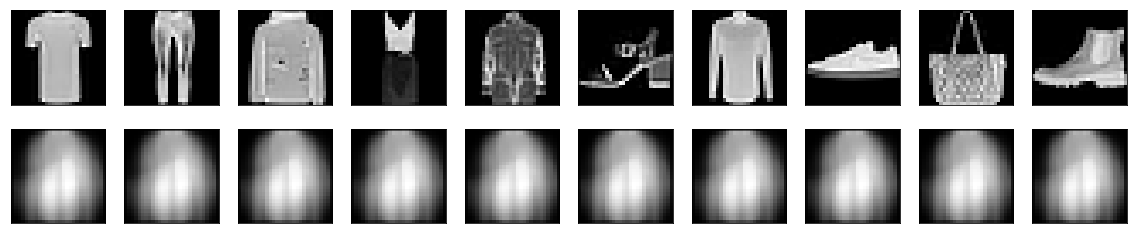

In [43]:
AE_sparse_L1.plot_reconstructions(x_small)

# 3. Debugging using metrics

## 3.1 Sparse L1

In [4]:
AE_sparse_L1 = SparseShallowAE_L1(sparsity_weight=0.1)

In [5]:
AE_sparse_L1.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 208us/step - loss: 20.4240 - mean_squared_error: 0.1374 - val_loss: 0.2879 - val_mean_squared_error: 0.0998
Epoch 2/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.1739 - mean_squared_error: 0.0920 - val_loss: 0.1219 - val_mean_squared_error: 0.0879
Epoch 3/100
60000/60000 [==============================] - 13s 223us/step - loss: 0.1163 - mean_squared_error: 0.0875 - val_loss: 0.1054 - val_mean_squared_error: 0.0868
Epoch 4/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.1051 - mean_squared_error: 0.0871 - val_loss: 0.0996 - val_mean_squared_error: 0.0867
Epoch 5/100
60000/60000 [==============================] - 12s 205us/step - loss: 0.1002 - mean_squared_error: 0.0870 - val_loss: 0.0966 - val_mean_squared_error: 0.0866
Epoch 6/100
60000/60000 [==============================] - 12s 204us/step - loss: 0.0975 - mean_squ

Epoch 49/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.0882 - mean_squared_error: 0.0870 - val_loss: 0.0877 - val_mean_squared_error: 0.0866
Epoch 50/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0882 - mean_squared_error: 0.0870 - val_loss: 0.0876 - val_mean_squared_error: 0.0866
Epoch 51/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.0881 - mean_squared_error: 0.0870 - val_loss: 0.0876 - val_mean_squared_error: 0.0866
Epoch 52/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.0881 - mean_squared_error: 0.0870 - val_loss: 0.0876 - val_mean_squared_error: 0.0866
Epoch 53/100
60000/60000 [==============================] - 11s 190us/step - loss: 0.0881 - mean_squared_error: 0.0870 - val_loss: 0.0876 - val_mean_squared_error: 0.0866
Epoch 54/100
60000/60000 [==============================] - 11s 188us/step - loss: 0.0881 - mean_squared_error: 0.0870 - val_loss: 0.0876 - val_m

In [6]:
recerr = AE_sparse_L1.reconstruction_error(x_test)
recerr

[0.0867754824399948, 0.0866417642235756]

In [7]:
x_rec_test = AE_sparse_L1.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)
mse

0.08664181

In [11]:
AE_sparse_L1.encoder.get_output_shape_at(1)

(None, 100)

In [26]:
batchSize=32
H_test = AE_sparse_L1.encode(x_test)
l1 = np.mean(np.sum(0.1*np.abs(H_test), axis=1)) 
l1+recerr[1]

0.08664594313345152

In [22]:
l1

1.3393931e-06

## 3.2 Changing the batch size (from 128 to 32)

In [4]:
AE_sparse_L1 = SparseShallowAE_L1(sparsity_weight=0.1)

In [27]:
AE_sparse_L1.autoencoder.fit(x=x_train, y=x_train, validation_data=(x_test, x_test), batch_size=32, epochs=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 26s 426us/step - loss: 0.0872 - mean_squared_error: 0.0870 - val_loss: 0.0868 - val_mean_squared_error: 0.0866
Epoch 2/100
60000/60000 [==============================] - 13s 221us/step - loss: 0.0872 - mean_squared_error: 0.0870 - val_loss: 0.0868 - val_mean_squared_error: 0.0866
Epoch 3/100
60000/60000 [==============================] - 16s 273us/step - loss: 0.0872 - mean_squared_error: 0.0870 - val_loss: 0.0868 - val_mean_squared_error: 0.0866
Epoch 4/100
60000/60000 [==============================] - 29s 488us/step - loss: 0.0872 - mean_squared_error: 0.0870 - val_loss: 0.0868 - val_mean_squared_error: 0.0866
Epoch 5/100
60000/60000 [==============================] - 29s 490us/step - loss: 0.0872 - mean_squared_error: 0.0870 - val_loss: 0.0868 - val_mean_squared_error: 0.0866
Epoch 6/100
60000/60000 [==============================] - 28s 462us/step - loss: 0.0872 - mean_squa

Epoch 49/100
60000/60000 [==============================] - 32s 538us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_mean_squared_error: 0.0866
Epoch 50/100
60000/60000 [==============================] - 31s 524us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_mean_squared_error: 0.0866
Epoch 51/100
60000/60000 [==============================] - 32s 533us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_mean_squared_error: 0.0866
Epoch 52/100
60000/60000 [==============================] - 32s 535us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_mean_squared_error: 0.0866
Epoch 53/100
60000/60000 [==============================] - 30s 505us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_mean_squared_error: 0.0866
Epoch 54/100
60000/60000 [==============================] - 30s 502us/step - loss: 0.0871 - mean_squared_error: 0.0870 - val_loss: 0.0867 - val_m

In [28]:
recerr = AE_sparse_L1.reconstruction_error(x_test)
recerr

[0.08671642197370528, 0.0866444819688797]

In [29]:
x_rec_test = AE_sparse_L1.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)
mse

0.08664454

## 3.3 New L1

In [3]:
AE_sparse_L1 = SparseShallowAE_L1(sparsity_weight=0.01)

In [4]:
AE_sparse_L1.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 227us/step - loss: 0.1763 - mean_squared_error: 0.1387 - val_loss: 0.1121 - val_mean_squared_error: 0.1015
Epoch 2/100
60000/60000 [==============================] - 15s 258us/step - loss: 0.1010 - mean_squared_error: 0.0930 - val_loss: 0.0943 - val_mean_squared_error: 0.0883
Epoch 3/100
60000/60000 [==============================] - 12s 197us/step - loss: 0.0929 - mean_squared_error: 0.0876 - val_loss: 0.0911 - val_mean_squared_error: 0.0867
Epoch 4/100
60000/60000 [==============================] - 11s 177us/step - loss: 0.0910 - mean_squared_error: 0.0869 - val_loss: 0.0900 - val_mean_squared_error: 0.0864
Epoch 5/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.0901 - mean_squared_error: 0.0867 - val_loss: 0.0893 - val_mean_squared_error: 0.0863
Epoch 6/100
60000/60000 [==============================] - 11s 187us/step - loss: 0.0896 - mean_squa

Epoch 49/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0868 - val_mean_squared_error: 0.0860
Epoch 50/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0867 - val_mean_squared_error: 0.0860
Epoch 51/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0867 - val_mean_squared_error: 0.0860
Epoch 52/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0867 - val_mean_squared_error: 0.0860
Epoch 53/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0867 - val_mean_squared_error: 0.0860
Epoch 54/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0871 - mean_squared_error: 0.0863 - val_loss: 0.0867 - val_mean_squ

In [5]:
recerr = AE_sparse_L1.reconstruction_error(x_test)
recerr

[0.06731255246400833, 0.06283648554086685]

In [6]:
x_rec_test = AE_sparse_L1.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)
mse

0.062836505

In [7]:
H_test = AE_sparse_L1.encode(x_test)
l1 = 0.01*np.mean(np.sum(np.abs(H_test), axis=1)) 

In [8]:
100*(l1 + recerr[1] - recerr[0])/recerr[0]

-7.40801588946783e-05

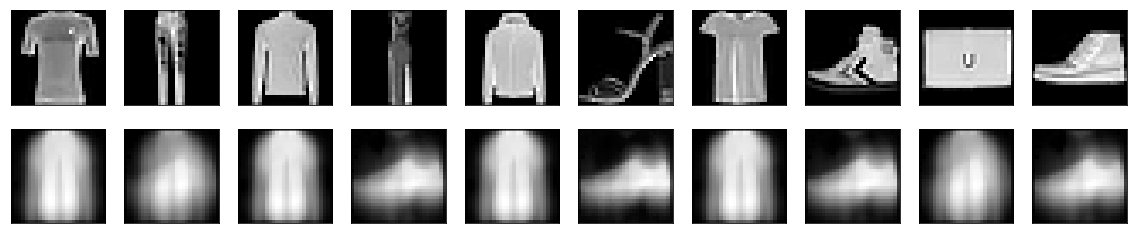

In [9]:
AE_sparse_L1.plot_reconstructions(x_small)

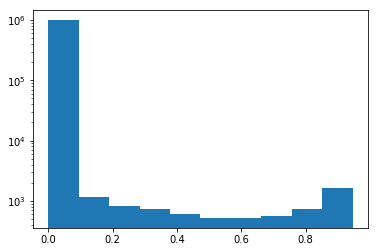

In [10]:
plt.hist(H_test.flatten(), log=True)

plt.show()

In [11]:
np.sum(H_test>0.1)

7168

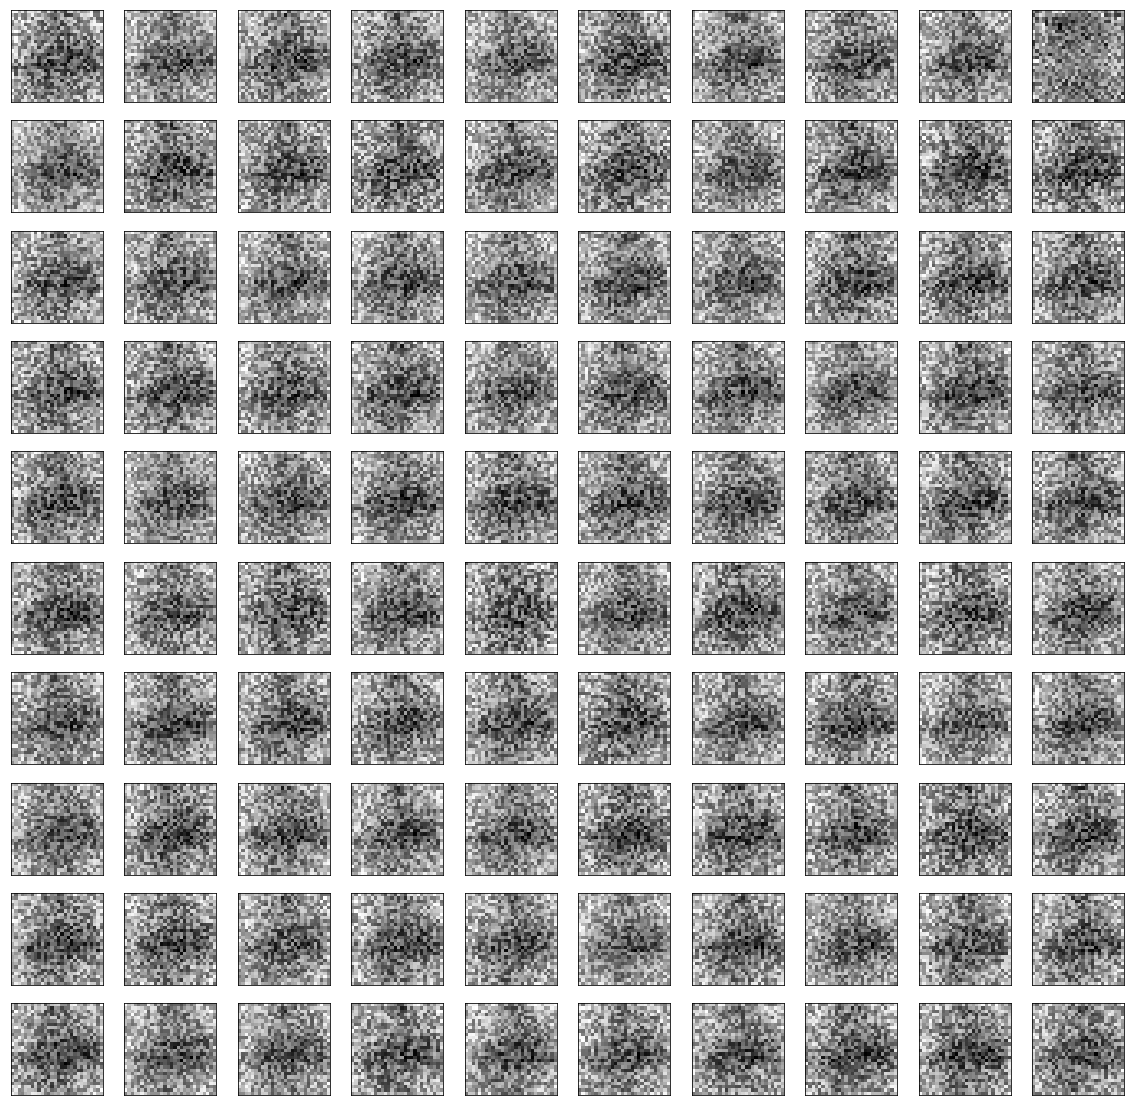

In [12]:
AE_sparse_L1.plot_atoms_encoder()

### 3.4 sparsity_weight=10, sparsity_objective=0.05

In [3]:
AE_kl = SparseShallowAE_KL_sum(sparsity_weight=10, sparsity_objective=0.05)

In [4]:
AE_kl.train(x_train, X_val=x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 140us/step - loss: 7.0569 - mean_squared_error: 0.1396 - val_loss: 0.5272 - val_mean_squared_error: 0.1035
Epoch 2/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.6061 - mean_squared_error: 0.0935 - val_loss: 1.0015 - val_mean_squared_error: 0.0864
Epoch 3/100
60000/60000 [==============================] - 8s 127us/step - loss: 0.6338 - mean_squared_error: 0.0829 - val_loss: 0.7839 - val_mean_squared_error: 0.0794
Epoch 4/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.5416 - mean_squared_error: 0.0780 - val_loss: 0.5292 - val_mean_squared_error: 0.0758
Epoch 5/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.6033 - mean_squared_error: 0.0751 - val_loss: 0.7119 - val_mean_squared_error: 0.0733
Epoch 6/100
60000/60000 [==============================] - 7s 118us/step - loss: 0.5691 - mean_squared_er

Epoch 49/100
60000/60000 [==============================] - 7s 108us/step - loss: 0.4866 - mean_squared_error: 0.0680 - val_loss: 0.3809 - val_mean_squared_error: 0.0675
Epoch 50/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.5222 - mean_squared_error: 0.0680 - val_loss: 0.3420 - val_mean_squared_error: 0.0672
Epoch 51/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.5140 - mean_squared_error: 0.0675 - val_loss: 0.3508 - val_mean_squared_error: 0.0669
Epoch 52/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.5977 - mean_squared_error: 0.0675 - val_loss: 0.5019 - val_mean_squared_error: 0.0679
Epoch 53/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.5288 - mean_squared_error: 0.0680 - val_loss: 0.4849 - val_mean_squared_error: 0.0670
Epoch 54/100
60000/60000 [==============================] - 7s 109us/step - loss: 0.5747 - mean_squared_error: 0.0680 - val_loss: 0.3931 - val_mean_sq

In [42]:
recerr = AE_kl.reconstruction_error(x_test)
recerr

[0.898606298828125, 0.066716570687294]

In [11]:
x_rec_test = AE_kl.reconstruction(x_test)
mse = np.mean((x_rec_test - x_test)**2)
mse

0.06671678

In [62]:
from keras import backend as K

batch_size = 128
rho = 0.05
beta=10
nb_batch = int(len(x_test)/batch_size)
batch_vals = np.zeros(nb_batch + 1)
idx=np.arange(len(x_test))
np.random.shuffle(idx)
for i in range(nb_batch):
    H_test = AE_kl.encode(x_test[i*batch_size:(i+1)*batch_size])
    s_hat = np.mean(H_test, axis=0)
    s_hat = np.clip(s_hat,K.epsilon(), 1)
    val = rho*np.log(rho/s_hat) + (1 - rho)*np.log((1-rho)/(1-s_hat))
    batch_vals[i] = beta*np.sum(val)
H_test = AE_kl.encode(x_test[-batch_size:])
s_hat = np.mean(H_test, axis=0)
s_hat = np.clip(s_hat,K.epsilon(), 1)
val = rho*np.log(rho/s_hat) + (1 - rho)*np.log((1-rho)/(1-s_hat))
batch_vals[-1] = beta*np.sum(val)

In [63]:
np.mean(batch_vals)

0.8329708149503398

In [65]:
100*(np.mean(batch_vals)+recerr[1] - recerr[0])/recerr[0]

0.12030705893321018

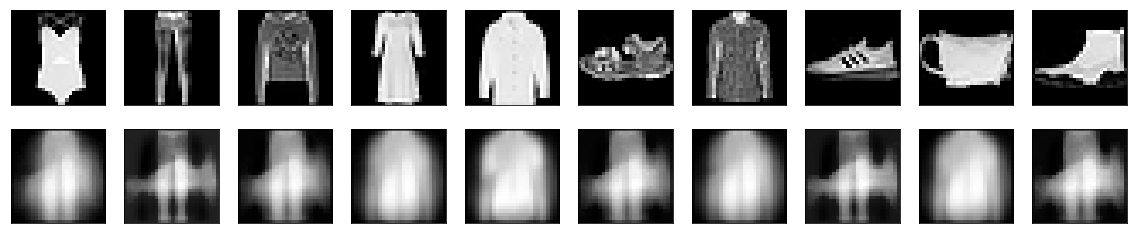

In [8]:
AE_kl.plot_reconstructions(x_small)

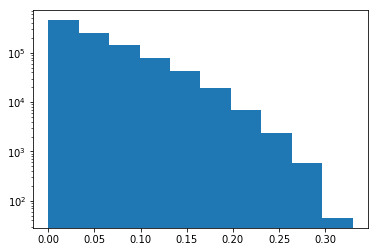

In [20]:
plt.hist(H_test.flatten(), log=True)
plt.show()

In [22]:
np.sum(H_test<0.001)

1830

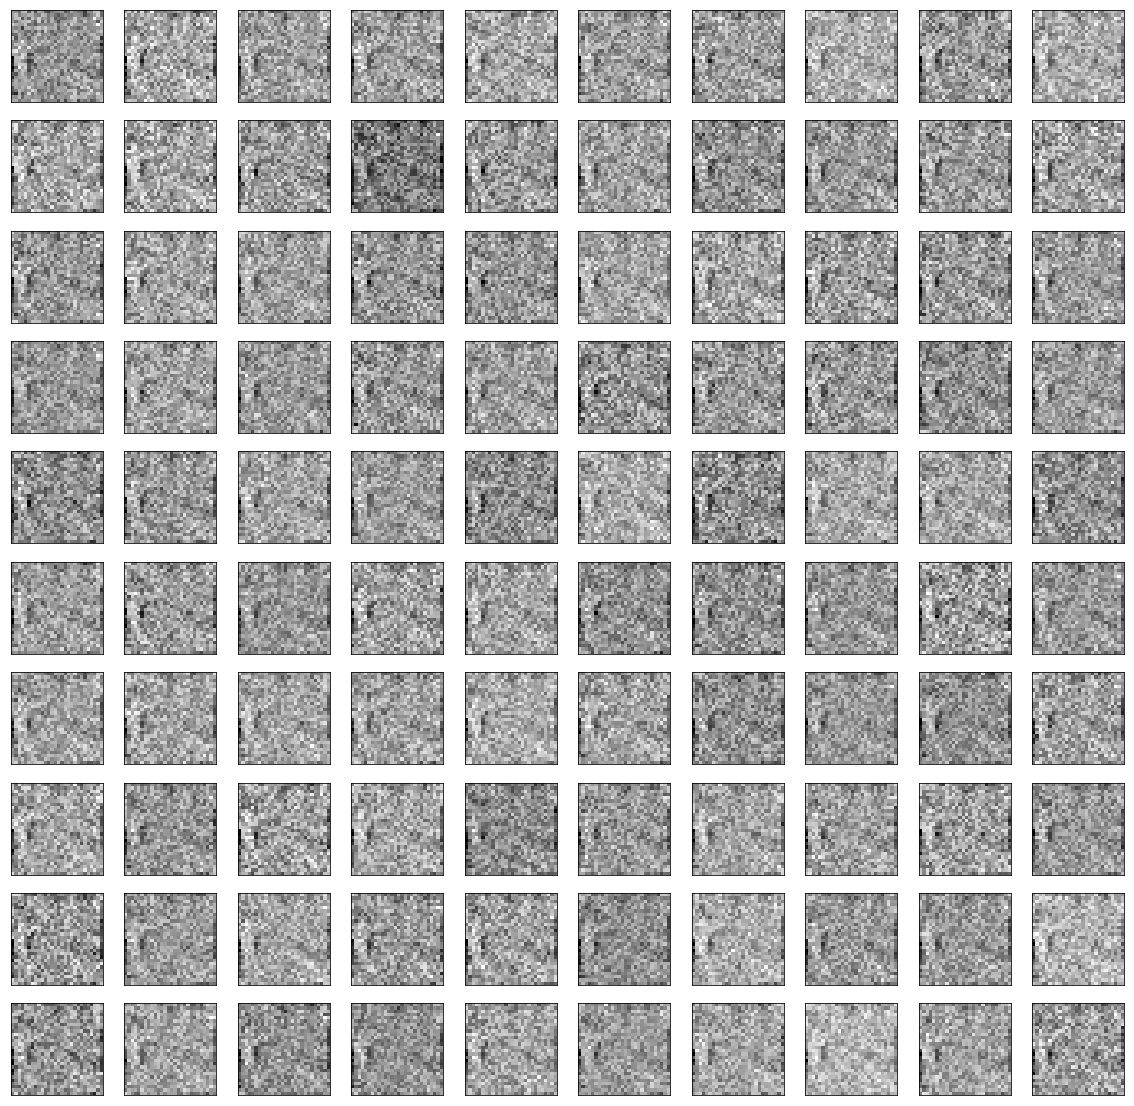

In [24]:
AE_kl.plot_atoms_encoder()